Merging Dataframes

Downloading dataframes from csv

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# csv_dir = 'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/'
# # List to hold dataframes
# csv_files = ['NoDrugDataset.csv','Drug5_1000nMrep1Dataset.csv','Drug5_1000nMrep2p1Dataset.csv','Drug8_1000nMrep1Dataset.csv','Drug8_1000nMrep2p1Dataset.csv','Drug_101000nMrep1Dataset.csv','Drug_101000nMrep2Dataset.csv']

In [65]:
csv_dir = 'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/'
# List to hold dataframes
csv_files = ['NoDrug_DesignResults.csv','Drug5_1000nM_DesignResults.csv','Drug8_1000nM_DesignResults.csv', 'Drug10_1000nM_DesignResults.csv']
TreatmentList = ['NoDrug','Drug5','Drug8','Drug10']

In [77]:
# Dictionary to hold DataFrames
dataframes = {}

# Import CSV files into DataFrames
for csv_file_index, csv_file in enumerate(csv_files):
    file_path = os.path.join(csv_dir, csv_file)
    df_name = os.path.splitext(csv_file)[0]  # Use file name without extension as DataFrame name
    dataframes[df_name] = pd.read_csv(file_path)
    dataframes[df_name].insert(0, 'Treatment',TreatmentList[csv_file_index])


In [78]:
for df_name, df in dataframes.items():
    print(f"DataFrame '{df_name}' has shape: {df.shape}")

DataFrame 'NoDrug_DesignResults' has shape: (2961, 13)
DataFrame 'Drug5_1000nM_DesignResults' has shape: (2856, 13)
DataFrame 'Drug8_1000nM_DesignResults' has shape: (2793, 13)
DataFrame 'Drug10_1000nM_DesignResults' has shape: (2877, 13)


In [79]:
print(dataframes)

{'NoDrug_DesignResults':      Treatment       Cell_id  Rep_Num  FOV_Num  drug_time  drug_concentration  \
0       NoDrug   rep1_FOV1_1        1        1        inf                   0   
1       NoDrug   rep1_FOV1_1        1        1        inf                   0   
2       NoDrug   rep1_FOV1_1        1        1        inf                   0   
3       NoDrug   rep1_FOV1_1        1        1        inf                   0   
4       NoDrug   rep1_FOV1_1        1        1        inf                   0   
...        ...           ...      ...      ...        ...                 ...   
2956    NoDrug  rep2_FOV6_11        2        6        inf                   0   
2957    NoDrug  rep2_FOV6_11        2        6        inf                   0   
2958    NoDrug  rep2_FOV6_11        2        6        inf                   0   
2959    NoDrug  rep2_FOV6_11        2        6        inf                   0   
2960    NoDrug  rep2_FOV6_11        2        6        inf                   0   

  

In [80]:
# Merge DataFrames into one giant DataFrame
giant_df = pd.concat(dataframes, ignore_index=True)
# Print the shape of the merged DataFrame
print(giant_df.shape)

(11487, 13)


In [81]:
print(giant_df)

      Treatment      Cell_id  Rep_Num  FOV_Num  drug_time  drug_concentration  \
0        NoDrug  rep1_FOV1_1        1        1        inf                   0   
1        NoDrug  rep1_FOV1_1        1        1        inf                   0   
2        NoDrug  rep1_FOV1_1        1        1        inf                   0   
3        NoDrug  rep1_FOV1_1        1        1        inf                   0   
4        NoDrug  rep1_FOV1_1        1        1        inf                   0   
...         ...          ...      ...      ...        ...                 ...   
11482    Drug10  rep2_FOV6_8        2        6     1200.0                   1   
11483    Drug10  rep2_FOV6_8        2        6     1200.0                   1   
11484    Drug10  rep2_FOV6_8        2        6     1200.0                   1   
11485    Drug10  rep2_FOV6_8        2        6     1200.0                   1   
11486    Drug10  rep2_FOV6_8        2        6     1200.0                   1   

       cell_Num  Time  num_

In [3]:
# # Iterate over all files in the directory
# for file in os.listdir(csv_dir):
#     if file.endswith('.csv'):
#         file_path = os.path.join(csv_dir, file)
#         df = pd.read_csv(file_path)
#         dataframes.append(df)
# print(dataframes)

[         Treatment Replica   FOV  Time  CellCount  CellArea  NucleusArea  \
0           NoDrug    rep1  FOV1     0          1      7473         2754   
1           NoDrug    rep1  FOV1     0          2      8138         2851   
2           NoDrug    rep1  FOV1     0          3      8266         5069   
3           NoDrug    rep1  FOV1     0          4      7905         3203   
4           NoDrug    rep1  FOV1     0          5      7696         3087   
...            ...     ...   ...   ...        ...       ...          ...   
4383  Drug5_1000nM    rep1  FOV6     9          3      8006         3097   
4384  Drug5_1000nM    rep1  FOV6     9          4      8476         6259   
4385  Drug5_1000nM    rep1  FOV6    10          1      7470         6984   
4386  Drug5_1000nM    rep1  FOV6    13          1      7507         5815   
4387  Drug5_1000nM    rep1  FOV6    13          2      7788         2988   

      mRNA_nucleus  mRNA_cytosol  
0              0.0           9.0  
1              0

In [82]:
# Group by 'Treatment' and 'Time', and calculate the mean of 'mRNA_nucleus'
grouped_df_nuc = giant_df.groupby(['Treatment', 'Time']).agg({'num_rna_nuc': 'mean'}).reset_index()

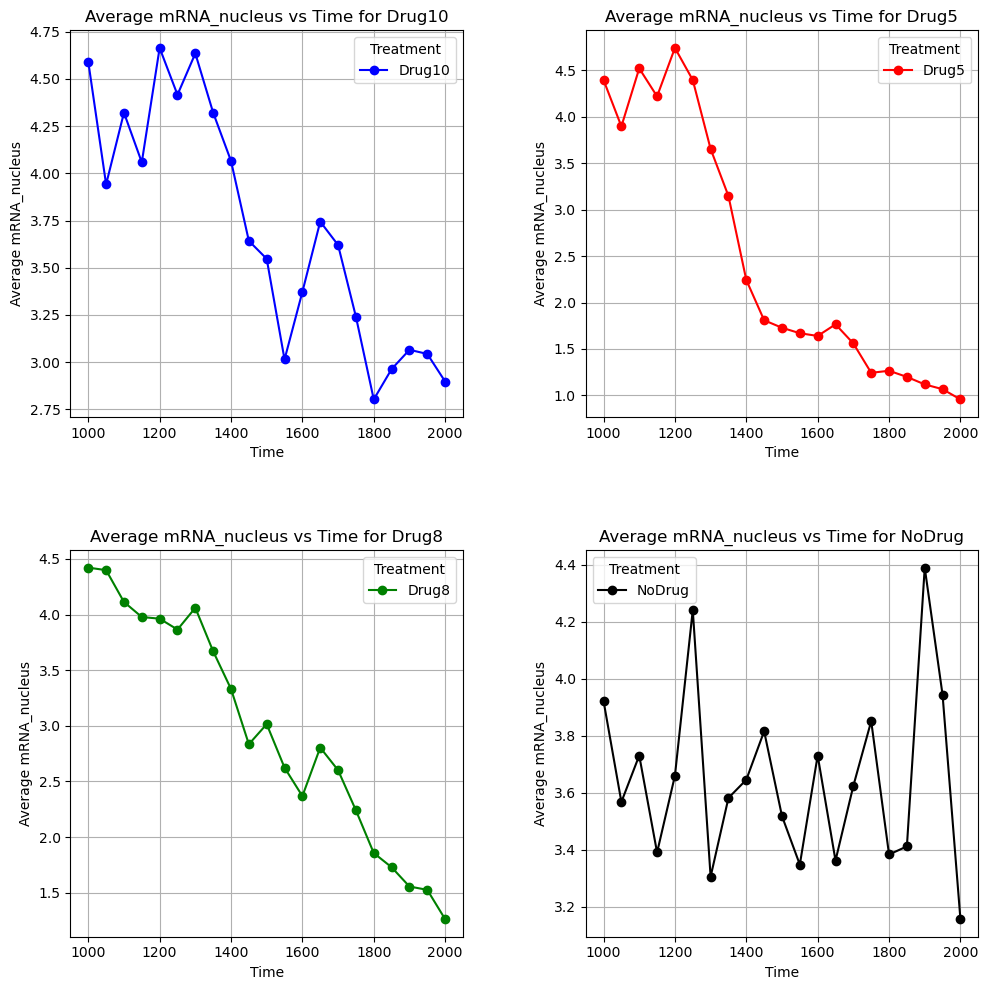

In [83]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

colors = ['blue','red','green','black']
# Get the unique treatments
treatments = grouped_df_nuc['Treatment'].unique()

# Iterate through each subplot and treatment
for i, ax in enumerate(axs.flat):
    if i < len(treatments):  # Ensure we don't try to plot more treatments than subplots available
        treatment = treatments[i]
        treatment_data = grouped_df_nuc[grouped_df_nuc['Treatment'] == treatment]
        
        # Plot the data on the current subplot
        ax.plot(treatment_data['Time'], treatment_data['num_rna_nuc'], marker='o', label=treatment, color = colors[i])
        
        # Add labels and title to the current subplot
        ax.set_xlabel('Time')
        ax.set_ylabel('Average mRNA_nucleus')
        ax.set_title(f'Average mRNA_nucleus vs Time for {treatment}')
        ax.legend(title='Treatment')
        ax.grid(True)

# Adjust layout
plt.tight_layout(w_pad =5,h_pad=5)

# Show plot
plt.show()

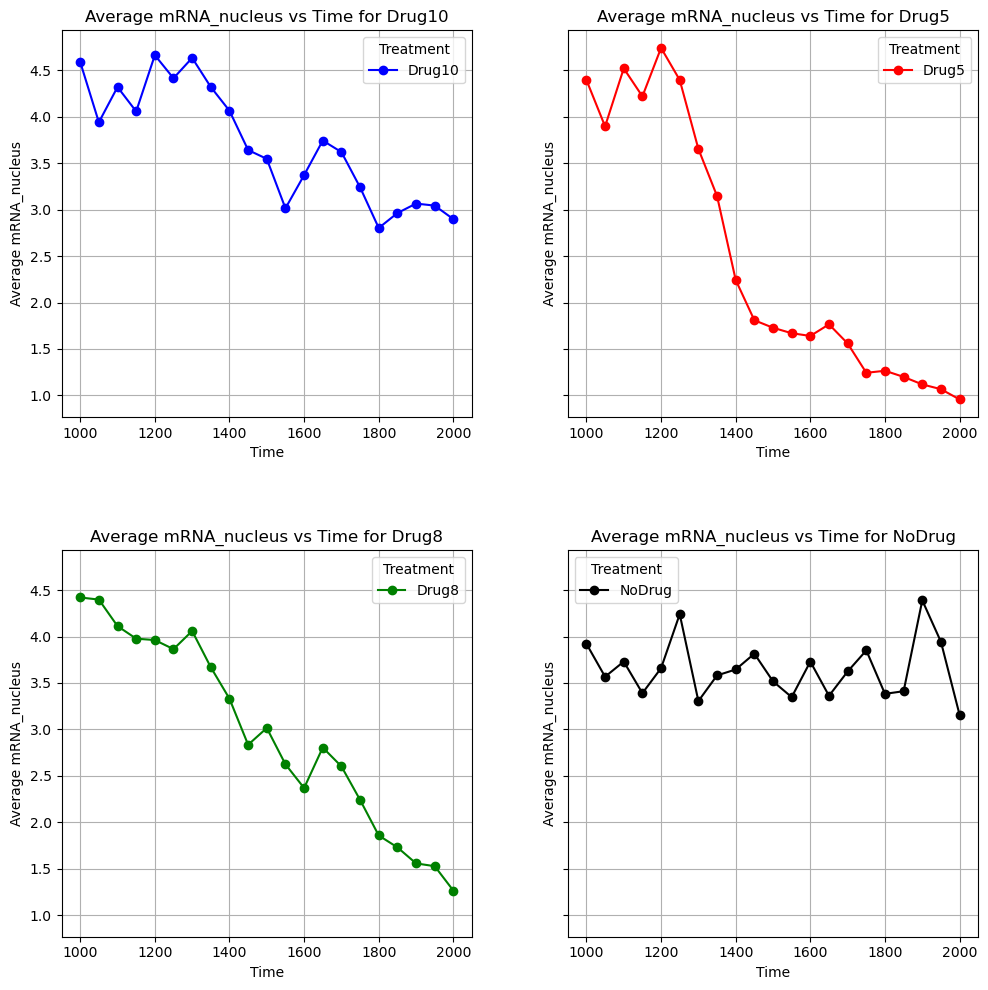

In [84]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

colors = ['blue','red','green','black']
# Get the unique treatments
treatments = grouped_df_nuc['Treatment'].unique()

# Iterate through each subplot and treatment
for i, ax in enumerate(axs.flat):
    if i < len(treatments):  # Ensure we don't try to plot more treatments than subplots available
        treatment = treatments[i]
        treatment_data = grouped_df_nuc[grouped_df_nuc['Treatment'] == treatment]
        
        # Plot the data on the current subplot
        ax.plot(treatment_data['Time'], treatment_data['num_rna_nuc'], marker='o', label=treatment, color = colors[i])
        
        # Add labels and title to the current subplot
        ax.set_xlabel('Time')
        ax.set_ylabel('Average mRNA_nucleus')
        ax.set_title(f'Average mRNA_nucleus vs Time for {treatment}')
        ax.legend(title='Treatment')
        ax.grid(True)

# Adjust layout
plt.tight_layout(w_pad =5,h_pad=5)

# Show plot
plt.show()

In [85]:
# Group by 'Treatment' and 'Time', and calculate the mean of 'mRNA_nucleus'
grouped_df_cyto = giant_df.groupby(['Treatment', 'Time']).agg({'num_rna_cyto': 'mean'}).reset_index()

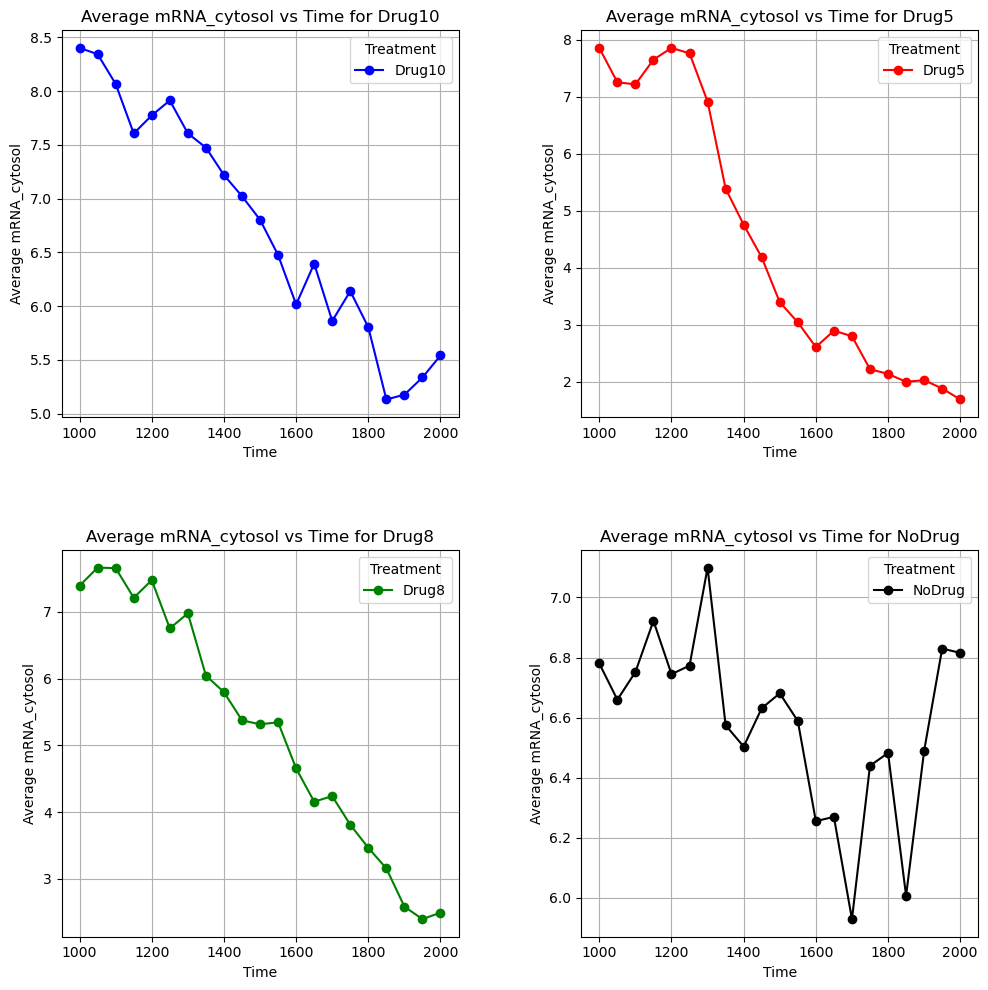

In [86]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

colors = ['blue','red','green','black']
# Get the unique treatments
treatments = grouped_df_cyto['Treatment'].unique()

# Iterate through each subplot and treatment
for i, ax in enumerate(axs.flat):
    if i < len(treatments):  # Ensure we don't try to plot more treatments than subplots available
        treatment = treatments[i]
        treatment_data = grouped_df_cyto[grouped_df_cyto['Treatment'] == treatment]
        
        # Plot the data on the current subplot
        ax.plot(treatment_data['Time'], treatment_data['num_rna_cyto'], marker='o', label=treatment, color = colors[i])
        
        # Add labels and title to the current subplot
        ax.set_xlabel('Time')
        ax.set_ylabel('Average mRNA_cytosol')
        ax.set_title(f'Average mRNA_cytosol vs Time for {treatment}')
        ax.legend(title='Treatment')
        ax.grid(True)

# Adjust layout
plt.tight_layout(w_pad =5,h_pad=5)

# Show plot
plt.show()

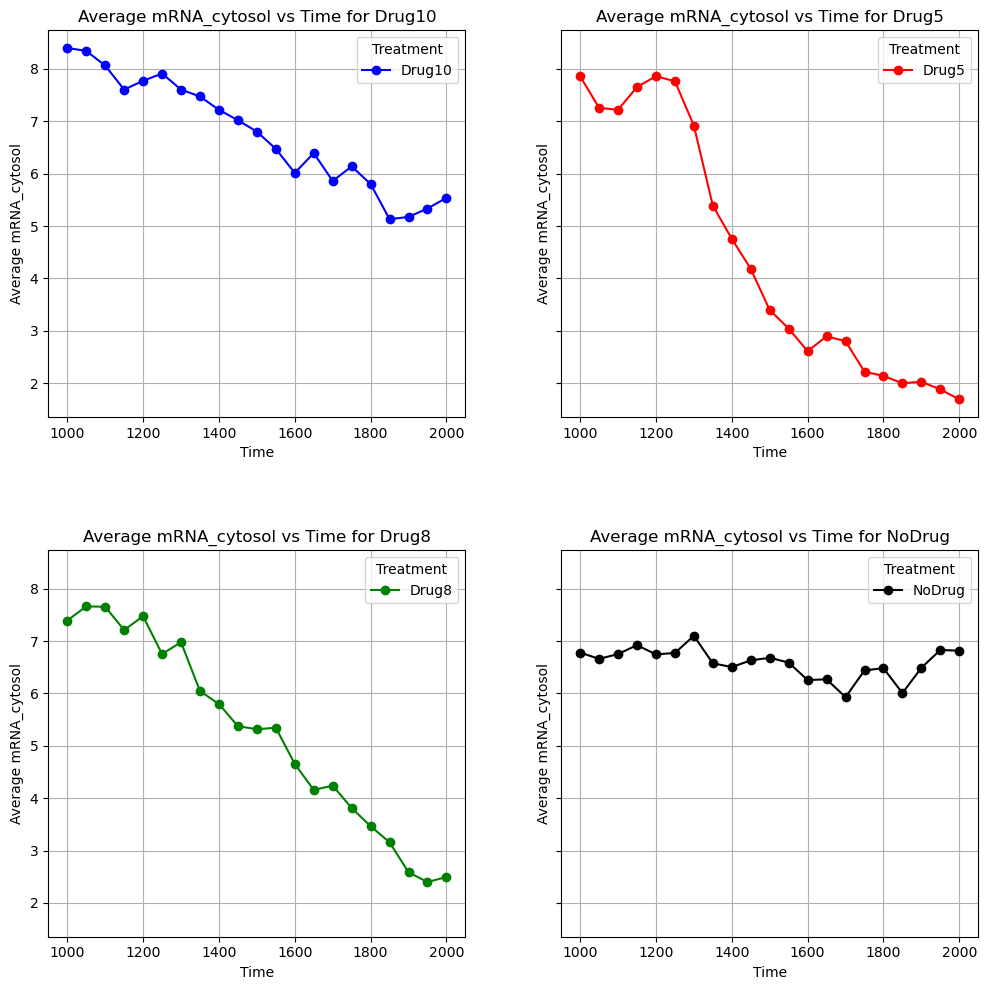

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

colors = ['blue','red','green','black']
# Get the unique treatments
treatments = grouped_df_cyto['Treatment'].unique()

# Iterate through each subplot and treatment
for i, ax in enumerate(axs.flat):
    if i < len(treatments):  # Ensure we don't try to plot more treatments than subplots available
        treatment = treatments[i]
        treatment_data = grouped_df_cyto[grouped_df_cyto['Treatment'] == treatment]
        
        # Plot the data on the current subplot
        ax.plot(treatment_data['Time'], treatment_data['num_rna_cyto'], marker='o', label=treatment, color = colors[i])
        
        # Add labels and title to the current subplot
        ax.set_xlabel('Time')
        ax.set_ylabel('Average mRNA_cytosol')
        ax.set_title(f'Average mRNA_cytosol vs Time for {treatment}')
        ax.legend(title='Treatment')
        ax.grid(True)

# Adjust layout
plt.tight_layout(w_pad =5,h_pad=5)

# Show plot
plt.show()

In [92]:
# Group by 'Treatment' and 'Time' and calculate the mean of 'CellCount'
mean_cell_count_by_time = giant_df.groupby(['Treatment', 'Time'])['cell_Num'].mean().reset_index()

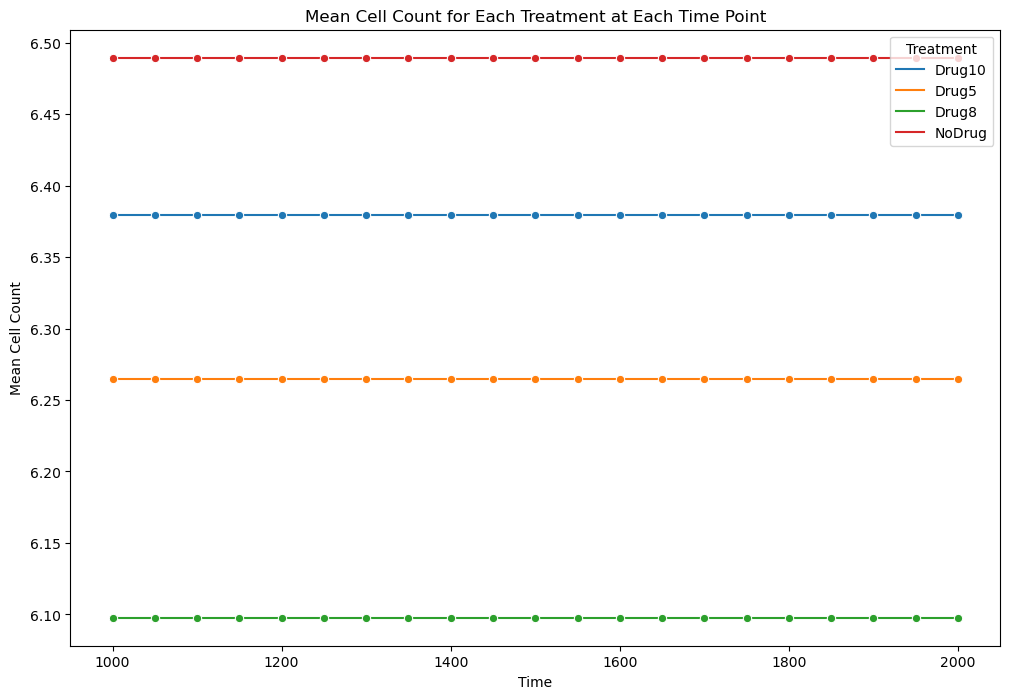

In [93]:
# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=mean_cell_count_by_time, x='Time', y='cell_Num', hue='Treatment', marker='o')

# Adding titles and labels
plt.title('Mean Cell Count for Each Treatment at Each Time Point')
plt.xlabel('Time')
plt.ylabel('Mean Cell Count')

# Display the plot
plt.show()

In [ ]:
FileList = []